## 1. Loading and Displaying Well Data From CSV

Created By: Andy McDonald

The following tutorial illustrates loading basic well log data from a csv file by using pandas, and displaying the data using the plotting option available in pandas. 

In [20]:
import pandas as pd
import numpy as np

In [21]:
well = pd.read_csv("Data/L0509WellData.csv", header=0)

To check that the data has been loaded in correctly, we can use the .head() function in pandas to view the first 5 rows and the header.

In [22]:
well.head()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,4609.8008,89.059479,-999.000000,2.483700,0.018494,0.129119
1,4609.9008,90.721848,-999.000000,2.489308,0.013656,0.108034
2,4610.0008,90.709061,-999.000000,2.501088,0.011289,0.085650
3,4610.1008,89.568954,66.223099,2.515450,0.008615,0.070332
4,4610.2008,88.169571,66.705551,2.530982,0.005628,0.065343


### Well Log Parameters

| **Parameter** | **Meaning**                              | **Use**                                             |
|---------------|------------------------------------------|------------------------------------------------------|
| **DEPTH**     | Depth in the well (usually in meters/feet). | Reference for all other readings.                   |
| **GR**        | *Gamma Ray* - Measures natural radioactivity. High in shales, low in sandstones/limestones. | Identifies lithology (shale vs reservoir).          |
| **DT**        | *Delta-T* - Sonic travel time (µs/ft).    | Indicates porosity and rock type.                   |
| **RHOB**      | *Bulk Density* - Mass per unit volume (g/cm³). | Estimates porosity and formation density.       |
| **DRHO**      | *Density Correction* - Difference between two density tools. | Detects gas zones or borehole washouts.        |
| **NPHI**      | *Neutron Porosity* - Measures hydrogen content (usually from fluids). | Estimates porosity and fluid content.      |

> 💡 These logs are essential for evaluating **reservoir quality**, **fluid presence**, and **geological formations**.


We can also view some statistics on the curves by using the describe() function.

In [63]:
well.describe()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
count,1921.000000,1921.000000,1918.000000,1921.000000,1921.000000,1921.000000
mean,4705.800425,67.543849,67.398183,2.554064,0.020477,0.114056
std,55.468658,31.455753,4.525434,0.121438,0.045450,0.039322
min,4609.800800,19.605911,54.929482,1.947107,-0.132031,0.033476
25%,4657.800600,38.902794,64.324596,2.495097,-0.012742,0.092152
50%,4705.800400,63.487732,67.392708,2.557842,0.006896,0.111190
75%,4753.800200,95.923019,70.078076,2.647077,0.054896,0.128894
max,4801.800000,137.462921,89.620895,2.788836,0.134148,0.417384


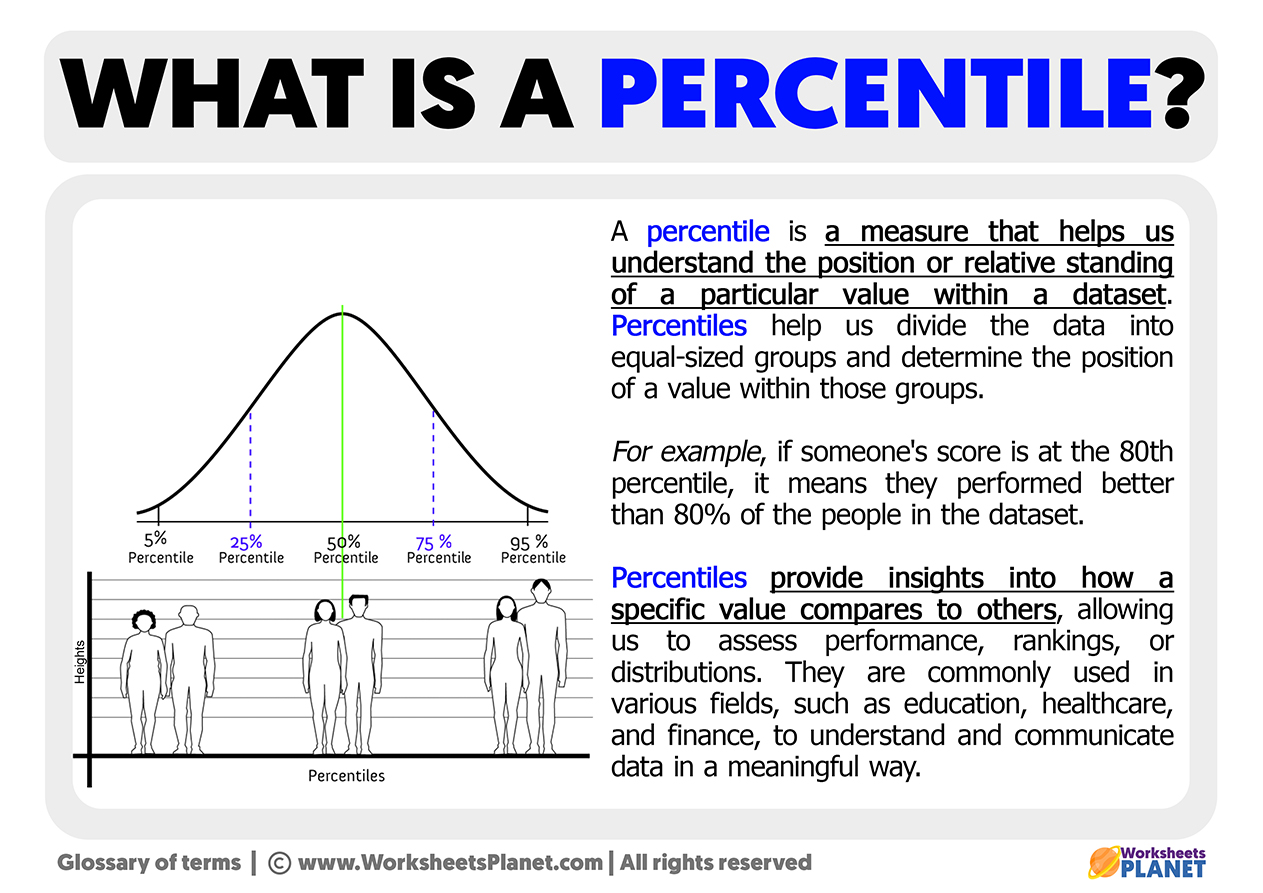

In [64]:
mean = well['GR'].mean()
std = well['GR'].std()
p5 = well['GR'].quantile(0.05)
p95 = well['GR'].quantile(0.95)
print(f"Mean: {mean}\nStd: {std}\n5th Percentile: {p5}\n95th Percentile: {p95}\n")

Mean: 67.54384883966684
Std: 31.455753165307208
5th Percentile: 25.586803
95th Percentile: 117.153412



Before carrying out any displaying of data or calculations, we carry out some data cleansing. The first is the conversion of null values, represented by -999.25, to a Not a Number (NaN). We can achieve this using the replace function.

In [65]:
well.replace(-999, np.nan, inplace=True)

If we now call the describe and head functions on the well dataframe, we can see that the nulls have been been replaced.

In [66]:
well.describe()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
count,1921.000000,1921.000000,1918.000000,1921.000000,1921.000000,1921.000000
mean,4705.800425,67.543849,67.398183,2.554064,0.020477,0.114056
std,55.468658,31.455753,4.525434,0.121438,0.045450,0.039322
min,4609.800800,19.605911,54.929482,1.947107,-0.132031,0.033476
25%,4657.800600,38.902794,64.324596,2.495097,-0.012742,0.092152
50%,4705.800400,63.487732,67.392708,2.557842,0.006896,0.111190
75%,4753.800200,95.923019,70.078076,2.647077,0.054896,0.128894
max,4801.800000,137.462921,89.620895,2.788836,0.134148,0.417384


In [67]:
well.head()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,4609.8008,89.059479,NaN,2.483700,0.018494,0.129119
1,4609.9008,90.721848,NaN,2.489308,0.013656,0.108034
2,4610.0008,90.709061,NaN,2.501088,0.011289,0.085650
3,4610.1008,89.568954,66.223099,2.515450,0.008615,0.070332
4,4610.2008,88.169571,66.705551,2.530982,0.005628,0.065343


By default, the well.head() function produces the first 5 rows of data. We can extend this by passing in a value to the head function.

In [68]:
well.head(20)

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,4609.8008,89.059479,NaN,2.483700,0.018494,0.129119
1,4609.9008,90.721848,NaN,2.489308,0.013656,0.108034
2,4610.0008,90.709061,NaN,2.501088,0.011289,0.085650
3,4610.1008,89.568954,66.223099,2.515450,0.008615,0.070332
4,4610.2008,88.169571,66.705551,2.530982,0.005628,0.065343
5,4610.3008,86.943130,67.237823,2.543377,0.001724,0.066881
6,4610.4008,86.172943,67.531052,2.550319,-0.002829,0.067540
7,4610.5008,86.267899,68.183243,2.555398,-0.006574,0.065946
8,4610.6008,87.750702,68.546539,2.564067,-0.008947,0.063870
9,4610.7008,90.922546,68.219681,2.578216,-0.010293,0.063689


Now we have some data appearing in the GR column.

### Viewing Data on a Log Plot

With pandas, we can quickly bring up a plot of our well data by using the .plot() function on our well dataframe. <br><br>If we just specify the x and y axis, we can generate a simple line plot.

<Axes: xlabel='DEPTH'>

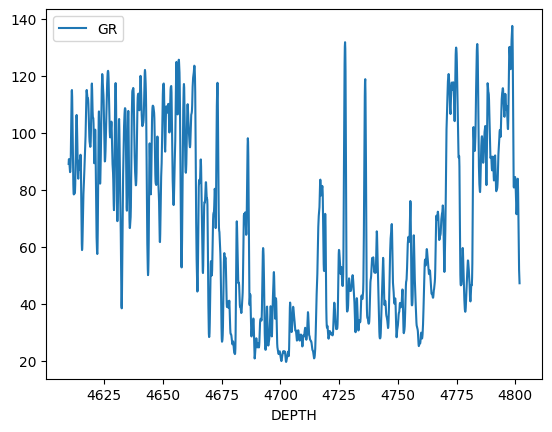

In [28]:
well.plot(x = 'DEPTH', y = 'GR')

We can change the type of plot by using the keyword kind and passing in the word scatter. In this example we have a familiar density neutron crossplot. <b>Note</b> that we can change the y-axis scales so that they are flipped and show increasing porosity as you move up the axis.

<Axes: title={'center': 'NPHI vs RHOB'}, xlabel='NPHI', ylabel='RHOB'>

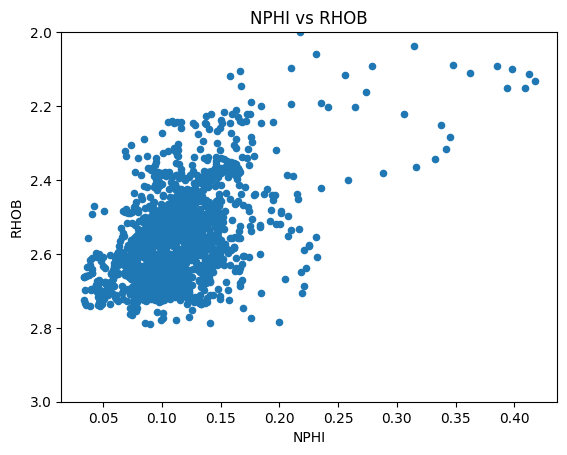

In [29]:
well.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB', ylim=(3, 2), title='NPHI vs RHOB')

We can also add some colour to our plot using the gamma ray as a third axis. This is done by including the c argument and specifying the column name. <br><br>
This helps us identify the cleaner intervals from shalier intervals

<Axes: xlabel='NPHI', ylabel='RHOB'>

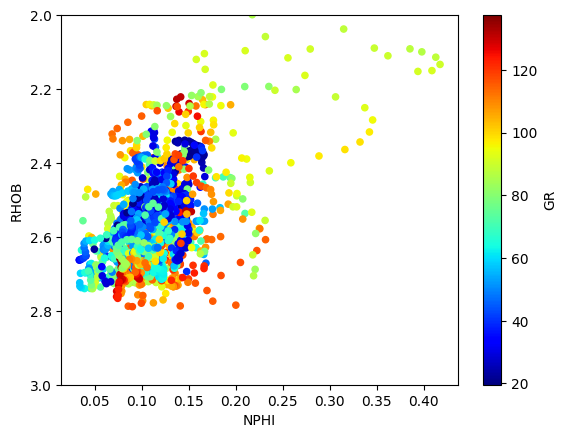

In [37]:
well.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB', c='GR', 
          colormap='jet', 
          ylim=(3, 2))

Data can also be easily displayed as a histogram in the form of bars:

<Axes: title={'center': 'Gamma Ray Histogram'}, xlabel='Gamma Ray (API)', ylabel='Density'>

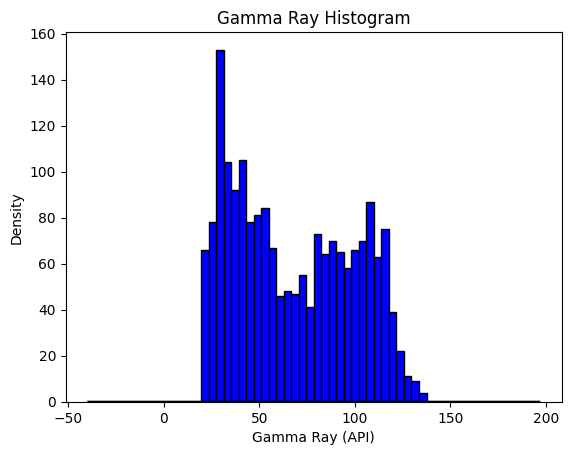

In [56]:

well['GR'].plot(kind="hist", bins = 30, title='Gamma Ray Histogram',
               xlabel='Gamma Ray (API)',  ylabel='Count',
               color='blue', edgecolor='black')


Or using a Kernel Density Estimate:

<Axes: title={'center': 'Gamma Ray Density Plot'}, ylabel='Density'>

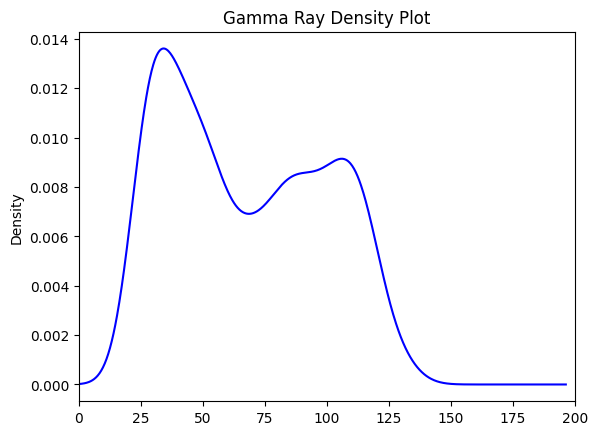

In [45]:
well['GR'].plot(kind="kde", xlim =(0,200), title='Gamma Ray Density Plot',
                xlabel='Gamma Ray (API)', ylabel='Density',
                color='blue')

That is all for this short tutorial. In the next one we will take our plotting to the next level and construct the familiar log plot using matplotlib.